In [10]:
%pylab inline
mpl.rcParams['font.size']=14

Populating the interactive namespace from numpy and matplotlib


/Users/kdk/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Exercise 1: Mean vs. Median

Create fake measurement sets with small numbers of measurements in them (between 2 and 10) and compute the mean and median to get a feel for how numpy computes medians when the sample size is small.

# Exercise 2: Uncertainties on Datapoints and their Mean

Suppose you take 50 images of a target and measure its brightness via aperture photometry in counts/sec:

In [11]:
nobs=50
counts_per_sec = np.random.randn(nobs)*300 + 5000

(array([ 2.,  4.,  6.,  8., 10.,  7.,  6.,  4.,  2.,  1.]),
 array([4406.26705295, 4544.89008729, 4683.51312164, 4822.13615599,
        4960.75919034, 5099.38222469, 5238.00525903, 5376.62829338,
        5515.25132773, 5653.87436208, 5792.49739643]),
 <BarContainer object of 10 artists>)

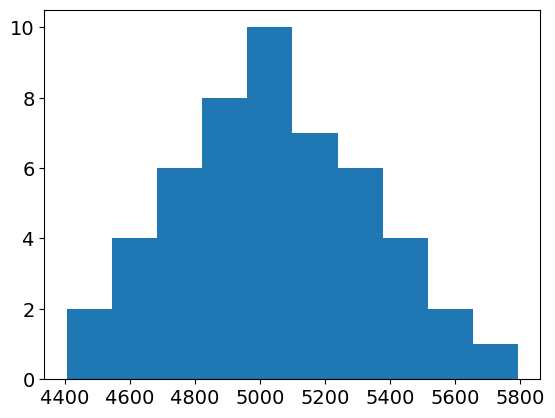

In [12]:
plt.hist(counts_per_sec)

(a) What uncertainty would you assign to each measurement?

(b) What value and uncertainty would you report for the target in counts/sec? Use the correct number of significant digits.

The measurements are plotted below. Add errorbars to the individual datapoints indicating their uncertainties. Draw a solid horizontal line indicating the mean of the datapoints and dashed horizontal lines indicating the mean plus/minus the uncertainty on the mean.

Text(0, 0.5, 'Measurement Value')

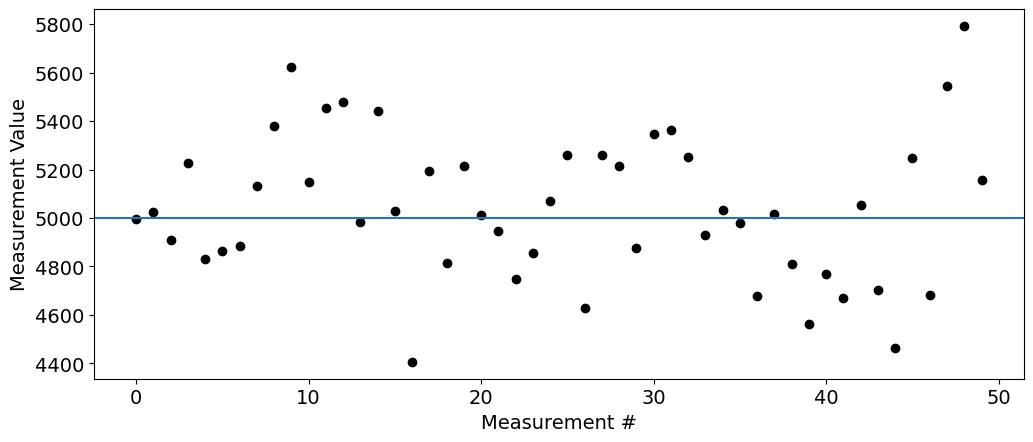

In [13]:
f=plt.figure() ; f.set_figwidth(12)
plt.plot(range(nobs),counts_per_sec,color='k',marker='o',linestyle='')
plt.axhline(5000)
plt.xlabel('Measurement #')
plt.ylabel('Measurement Value')

Question: How far is your mean from the true value? Given this, is the uncertainty you calculated on the mean reasonable?

# Exercise 3: Binning

Suppose you have the measurements defined below, measured at the wavelengths in the wavelengths array.

In [14]:
wavelengths = np.arange(600)+400 # nm
measurements = np.random.randn(len(wavelengths))*30 + 200

Place errorbars on the plot of the spectrum below using the standard deviation of the measurements.

Text(0, 0.5, 'Flux Density [arbitrary units]')

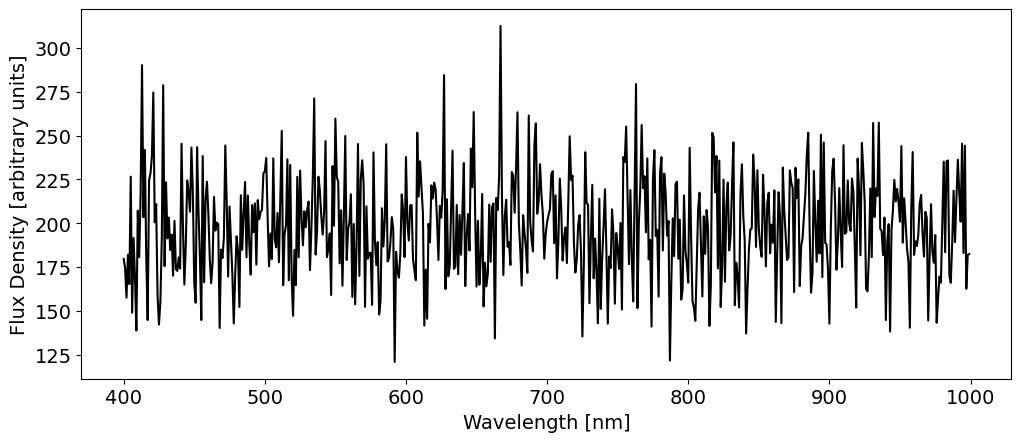

In [15]:
f=plt.figure() ; f.set_figwidth(12)
plt.plot(wavelengths,measurements,color='k')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux Density [arbitrary units]')

Now, bin the data along the spectral axis by a factor of 10 (i.e. average together every 10 points) and plot the binned data and its uncertainties.

# Exercise 4: Propagation of Uncertainty

Suppose that for the observation in Exercise 2, you observed standard star HD 203893 in the same filter (J band) and measured it at 8440+/-80 counts/second. Look up the magnitude of the star in J band and its uncertainty:
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=hd+203893&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id. Remember that SIMBAD is not a reference itself but a pointer to other references - in this case, the listed JHK magnitudes come from 2MASS survey. Use the J magnitude and its uncertainty to compute the flux density of the target in W/m^2/micron and its uncertainty. You can use the Gemini converter to convert between magnitudes and flux densities:
https://www.gemini.edu/observing/resources/magnitudes-and-fluxes/conversions-between-magnitudes-and-flux

# Exercise 5: Considering uncertainties on model parameters

Now suppose you have data in three different filters and are trying to measure a temperature and put uncertainties on it. The cells below plot the data with errorbars and overplot models for two somewhat-arbitrarily-chosen temperatures. You can adjust the temperature and see how changing the temperature affects where the model crosses the datapoints. Think about how you would place uncertainties on the temperature.

In [16]:
def planck(lam,T):
    # Inputs:
    # lam: an array of wavelengths in nm
    # T: temperature in Kelvins
    # Output:
    # Array of flux densities at each wavelength
    lam = lam*1e-9 # convert from nm to meters
    h = 6.626e-34 # m^2 kg/s
    kb = 1.38e-23 # m^2 kg s^-2 K^-1
    c = 3e8 # m/s
    Blam = (2.0*h*c**2./lam**5.)/(np.exp(h*c/(lam*kb*T))-1) # SI units
    return Blam

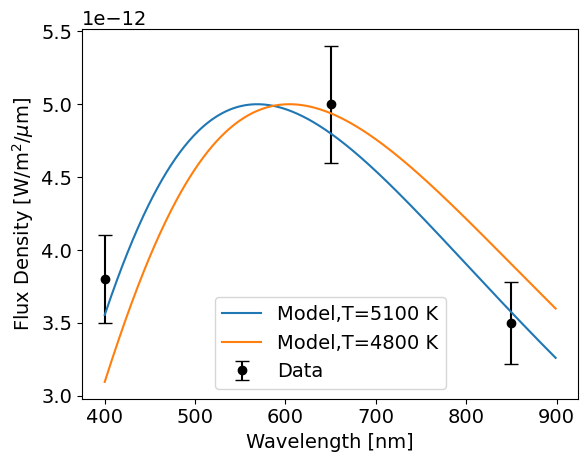

In [17]:
wavelength = np.array([400,650,850],dtype='float')
flux_density = np.array([3.8,5.0,3.5])*1e-12
flux_density_uncertainty = 0.08*flux_density

plt.errorbar(wavelength,flux_density,yerr=flux_density_uncertainty,color='k',marker='o',linestyle='',capsize=5,label='Data')

wavelength_dense = np.arange(500)+400

temperatureA = 5100 # Kelvin
modelA = planck(wavelength_dense,temperatureA)
rescaleA = np.max(flux_density)/np.max(modelA)
plt.plot(wavelength_dense,modelA*rescaleA,label='Model,T='+str(temperatureA)+' K')

temperatureB = 4800 # Kelvin
modelB = planck(wavelength_dense,temperatureB)
rescaleB = np.max(flux_density)/np.max(modelB)
plt.plot(wavelength_dense,modelB*rescaleB,label='Model,T='+str(temperatureB)+' K')

plt.ylabel('Flux Density [W/m$^2$/$\mu$m]')
plt.xlabel('Wavelength [nm]')
plt.legend(loc='best')

# Exercise 6: Asymmetric Uncertainties

In [18]:
pointsUp = np.random.randn(500)*100
pointsDn = np.random.randn(500)*200
pointsUp = np.abs(pointsUp)+5000
pointsDn = -np.abs(pointsDn)+5000

In [19]:
points = np.array([pointsUp,pointsDn]).flatten()

Question: How would you report the value and its uncertainty of a given parameter if your set of measurements of that parameter is the "points" array defined above? (shown in a histogram below)

Text(0, 0.5, 'Occurrence')

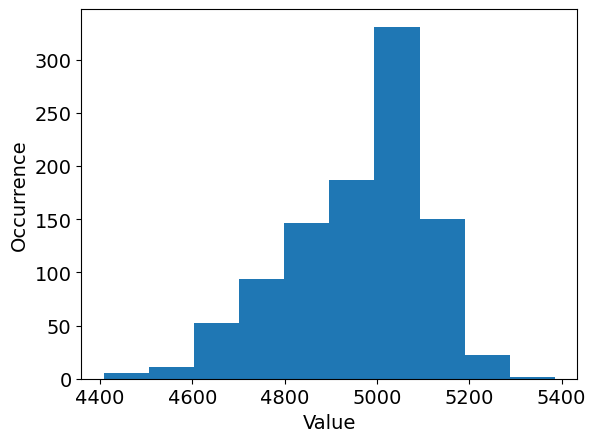

In [20]:
plt.hist(points)
plt.xlabel('Value')
plt.ylabel('Occurrence')